# Capstone 1

## Getting to Know the Data

<br>
This dataset comes from Lending Club and provides information on all loans made through the platform in the years 2007-2015. I've considered investing money with Lending Club in the past, but ultimately I decided against it due to feelings of uncertainty. The goal of this report, therefore, will be to evaluate the data set as a potential investor. We'll start by importing the packages we'll need for our analysis and by reading the data.
<br>
<br>

In [1]:
# importing packages we'll need
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('loan.csv', low_memory=False)
# reding the data set

The variables we will primarily be looking at are the annual income, debt-to-income ratio, and credit utilization ratio of each borrower, as well as the interest rate and grade of each loan. An 'A' grade represents the most secure loans, and a 'G' grade represents the riskiest loans.
<br>
<br>
In order to begin to understand our data, let's take a look at the summary statistics for the dollar amounts of these loans.
<br>
<br>
<br>

In [3]:
df.loan_amnt.describe()
# getting summary statistics

count    1.048575e+06
mean     1.538487e+04
std      9.533838e+03
min      1.000000e+03
25%      8.000000e+03
50%      1.300000e+04
75%      2.000000e+04
max      4.000000e+04
Name: loan_amnt, dtype: float64

<br>
<br>
The first thing to note is that Lending Club facilitated an amazing 1,048,575 loans over this period! Apparently a lot of people are comfortable investing in these loans. It appears that the range of allowable loan sizes is \$1,000-\$40,000. The mean loan size of \$15,385 looks to be representative of a typical loan based on the 25th, 50th, and 75th percentile values. It looks like loan sizes are more common towards the lower end of the acceptable range, but let's check for sure.
<br>
<br>
<br>

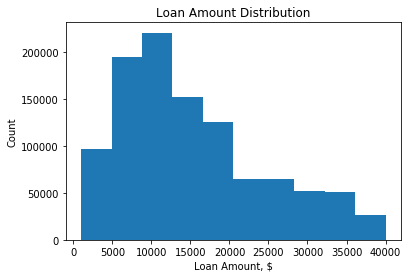

In [4]:
# creating a histogram
plt.hist(df.loan_amnt)
plt.title('Loan Amount Distribution')
plt.ylabel('Count')
plt.xlabel('Loan Amount, $')
plt.show()

We were right, there are definitely more loans toward the lower end of the range. In fact, it looks as though loan sizes follow a gamma distribution. Let's construct a q-q plot to see if this is, in fact, a gamma distribution.
<br>

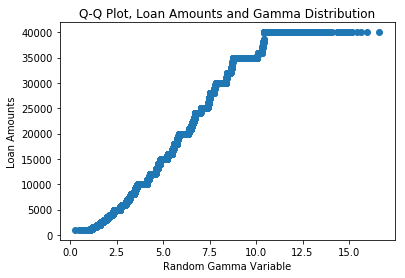

In [5]:
q = np.random.gamma(5, 1, 1048575) # generating a random gamma distribution
q10000 = np.random.choice(q, 10000) # taking 10000 instances
q10000.sort() # sorting for q-q plot
loan_amts = list(df.loan_amnt)
loan_amts10000 = np.random.choice(loan_amts, 10000) # taking 10000 instances
loan_amts10000.sort()# sorting for q-q plot
plt.scatter(x=q10000, y=loan_amts10000)
plt.ylabel('Loan Amounts')
plt.xlabel('Random Gamma Variable')
plt.title('Q-Q Plot, Loan Amounts and Gamma Distribution')
plt.show()

It looks like much of the data follows a rough gamma distribution, except the tail is too fat to truly be considered a gamma distribution.
<br>
<br>
The whole point of investing is to get a return. Are the returns for investors worthwhile?
<br>
<br>

In [6]:
df.int_rate.describe()

count    1.048575e+06
mean     1.280290e+01
std      4.962779e+00
min      5.310000e+00
25%      9.160000e+00
50%      1.199000e+01
75%      1.549000e+01
max      3.099000e+01
Name: int_rate, dtype: float64

<br>
The interest rates on these loans range from 5.31% to an eye-popping 30.99%. It looks like there is potential to make some serious cash here. But wait, what if the rate of 30.99% is an extreme outlier? Let's take a look at the distibution to get a better idea of what to expect.
<br>
<br>

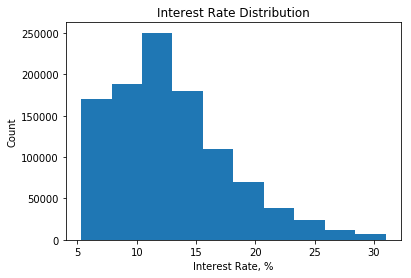

In [7]:
plt.hist(df.int_rate)
plt.title('Interest Rate Distribution')
plt.ylabel('Count')
plt.xlabel('Interest Rate, %')
plt.show()

<br>
Great! Although we ought not expect a 30% return, it looks like double-digit returns are very common. Finally, let's see how long our money would be tied up in one of these loans.
<br><br>

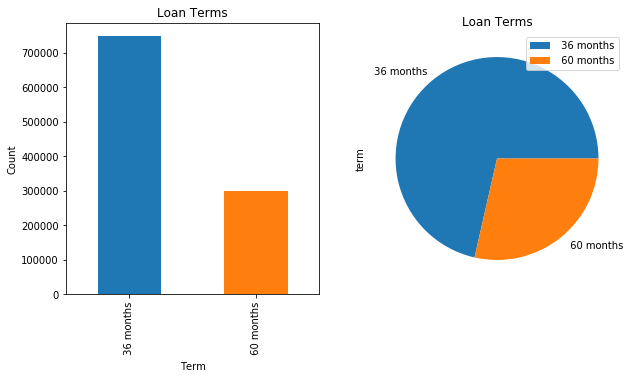

In [8]:
plt.figure(figsize=(10, 5)) #making a subplot

plt.subplot(1, 2, 1)
df.term.value_counts().plot(kind='bar')
plt.title('Loan Terms')
plt.ylabel('Count')
plt.xlabel('Term')

plt.subplot(1, 2, 2)
df.term.value_counts().plot(kind='pie')
plt.title('Loan Terms')
plt.legend()
plt.show()

In [9]:
df.term.value_counts()

 36 months    749095
 60 months    299480
Name: term, dtype: int64

<br>
So there are two options: a three year investment or a 5 year investment. There are also plenty of loans for each option, although three year loans make up the majority at 71%. Now that we're familiar with what Lending Club has to offer, let's answer some specific questions an investor might ask before making an investment decision.
<br>
<br>

## Analytical Questions

The three pre-investment questions we'll answer are as follows:
<br>
<br>
1. Investing is all about risk versus reward. How much incremental return can I expect for taking on incremental risk, as defined by Lending Club's loan grades?
<br>
2. I'm interested in 'A' rated loans since they should be the safest. What is the profile of a borrower who receives an 'A' grade?
<br>
3. I like safety, but I also like return. How much safer are 'A' loans than 'G' loans, and which class of loan offers the best risk-return tradeoff?
<br>

### Risk vs Reward

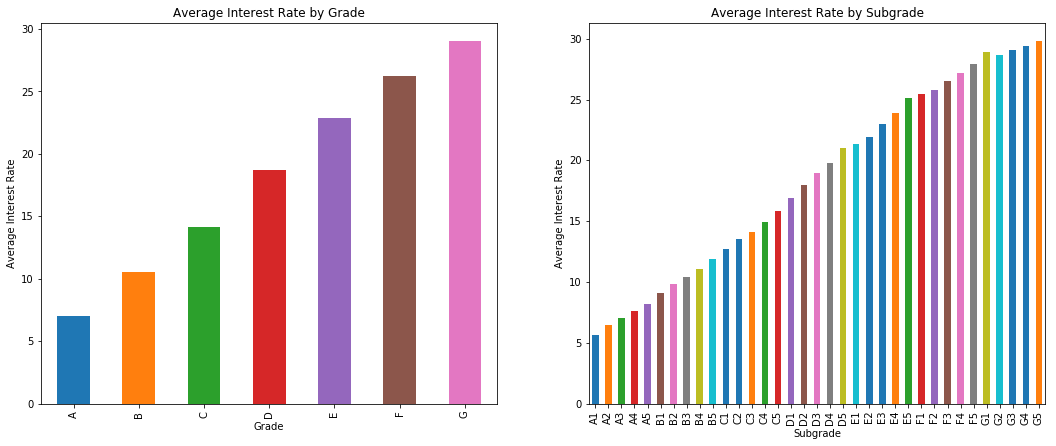

In [10]:
plt.figure(figsize=(18, 7))

plt.subplot(1, 2, 1)
grades = df.groupby('grade') # grouping the data by loan grade
grades.int_rate.mean().plot(kind='bar')
plt.title('Average Interest Rate by Grade')
plt.ylabel('Average Interest Rate')
plt.xlabel('Grade')

plt.subplot(1, 2, 2)
subgrades = df.groupby('sub_grade') # grouping the data by sub-grade
subgrades.int_rate.mean().plot(kind='bar')
plt.title('Average Interest Rate by Subgrade')
plt.ylabel('Average Interest Rate')
plt.xlabel('Subgrade')
plt.show()



By looking at the grades, there seems to be a linear relationship between risk and reward, with each riskier grade yielding an additional 3%-3.5% of return. When breaking the results down into subgrades the linear trend mostly holds, except there are a few subgrades that offer the same return, or even less return, than a less-risky subgrade. We'll need to look into why this might be the case if we decide to invest in or around these particular subgrades.
<br>
<br>
We have a good understanding of the average return we should expect for each loan grade, but does the average tell the whole story?
<br><br>

In [11]:
allbygrade = df.groupby('grade') # grouping all loans by grade

In [12]:
allbygrade.int_rate.describe()

,count,mean,std,min,25%,50%,75%,max
grade,,,,,,,,
A,226847.0,6.999172,0.990191,5.31,6.19,7.21,7.89,8.81
B,312159.0,10.516233,1.121443,6.00,9.75,10.56,11.47,12.98
C,293596.0,14.121375,1.281471,6.00,13.06,13.99,15.02,16.91
D,144272.0,18.681752,1.712712,6.00,17.47,18.45,19.92,22.35
E,53221.0,22.881614,2.645393,6.00,20.75,23.32,24.99,27.27
F,14773.0,26.245680,2.632826,6.00,24.11,25.88,28.72,30.75
G,3707.0,29.020947,1.622923,6.00,28.14,28.88,30.79,30.99


<br>
A few observances jump out from these summary statistics:<br>
 - Firstly, the majority of loans are grades A-D. 
 <br>
 - Secondly, by looking at the standard deviations, we can see that variation within the grade rises alongside risk, flattens at grade 'F', and then drops for the riskiest class, 'G'. 
 <br>
 - Finally, we can tell that there is some overlap between grades, as the maximum interest rate for each grade exceeds the minimum interest rate of the succeeding riskier grade. This overlap is more prevalent in the riskier grades, as max for grades A, B, and C does not exceed the 25th percentile value of the next grade, but the maxes of grades D, E, and F do exceed the 25th percentile value for the next grade.

### The Profile of an 'A' Borrower

Now that we understand the relationship between interest rates and grades, what can we learn about 'A' grade borrowers? We will look at debt-to-income ratios, credit utilization rates, yearly incomes, and why these borrowers need a loan in the first place.<br><br>

C:\Users\dhooker\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\dhooker\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


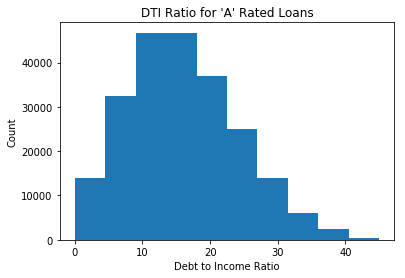

In [13]:
agrades = df.loc[df['grade'] == 'A'] # creating a new dataframe with only the A loans
plt.hist(agrades.dti, bins=10, range=(0, 45))
plt.title('DTI Ratio for \'A\' Rated Loans')
plt.ylabel('Count')
plt.xlabel('Debt to Income Ratio')
plt.show()

In [14]:
agrades['dti'].describe()

count    226618.000000
mean         16.582982
std          13.305918
min           0.000000
25%          10.060000
50%          15.370000
75%          21.550000
max         999.000000
Name: dti, dtype: float64

<br>
A quick Google search shows that most lenders like to see a DTI at the highest in the low to mid thirties, with lower always being better. These 'A' borrowers are looking good! From the histogram it appears that a very large majority have a DTI at or below this benchmark. The mean plus two standard deviations is 43, so we would expect 98% of the population to have a DTI below 43 if the distribution is normal. The distribution doesn't look perfectly normal, but in this case it looks to be ok to treat the distribution as normal. Now what does the credit utilization rate look like?
<br><br>

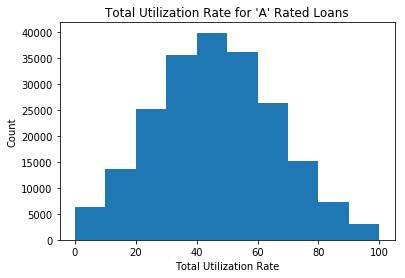

In [15]:
plt.hist(agrades.all_util, bins=10, range=(0, 100))
plt.title('Total Utilization Rate for \'A\' Rated Loans')
plt.ylabel('Count')
plt.xlabel('Total Utilization Rate')
plt.show()

In [16]:
agrades.all_util.describe()

count    209705.000000
mean         45.967039
std          20.113678
min           0.000000
25%          32.000000
50%          46.000000
75%          60.000000
max         188.000000
Name: all_util, dtype: float64

In [17]:
agrades.all_util.median()

46.0

In [18]:
agrades.all_util.mode()

0    47.0
dtype: float64

<br>
Now that looks like a normal distribution! The mean, median, and mode are all either 46 or 47 and the distribution looks almost like two mirror images around an axis at 46. However, lenders generally like to see utilization rates below 30, so the 'A' borrowers aren't doing nearly as well on this metric as on DTI. In fact, it looks like just under 25% of borrowers exceed the utilization benchmark.
<br><br><br>
Let's take a look at a Q-Q plot against a random normal distribution to see if this is truly a normal distribution.

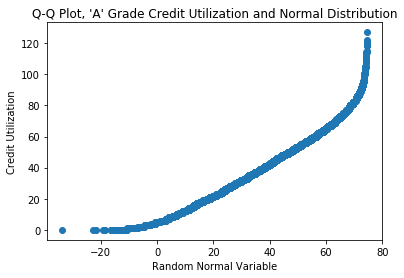

In [19]:
q2 = np.random.normal(45, 20, 10000) # creating a normal distribution for q-q plot
q2.sort()
a_util = np.random.choice(agrades.all_util, 10000)
a_util.sort()
plt.scatter(x=q2, y=a_util)
plt.xlabel('Random Normal Variable')
plt.ylabel('Credit Utilization')
plt.title('Q-Q Plot, \'A\' Grade Credit Utilization and Normal Distribution')
plt.show()

A couple things jump out. First off, there's no such thing as a negative credit utilization rate, which explains the change in slope when the random variable goes negative. Secondly, this Q-Q plot is mostly linear when the random variable is positive, so this is very close to a true normal distribution, but not quite.
<br> <br> <br>
Now let's take a look at the incomes of 'A' borrowers.

In [20]:
agrades.annual_inc.describe()

count    2.268470e+05
mean     9.087661e+04
std      9.912909e+04
min      0.000000e+00
25%      5.241600e+04
50%      7.500000e+04
75%      1.077875e+05
max      9.573072e+06
Name: annual_inc, dtype: float64

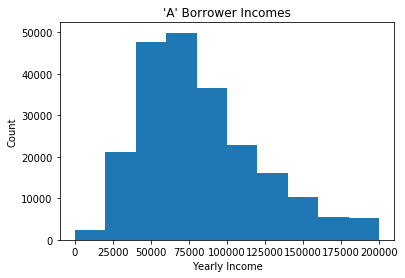

In [21]:
plt.hist(agrades.annual_inc, bins=10, range=(0, 200000))
plt.title('\'A\' Borrower Incomes')
plt.ylabel('Count')
plt.xlabel('Yearly Income')
plt.show()

The incomes of 'A' borrowers definitely do not follow a normal distribution, as evidenced by both the histogram and summary statistics. The mean and median differ significantly and the standard deviation is 10% larger than the mean. One thing we can glean from this information is these 'A' borrowers have significantly higher incomes than the US population as a whole; the 25th percentile earner of 'A' borrowers makes about as much as the average American household.

### A vs G, Which to Invest in?

Now let's get down to business, what differentiates an 'A' borrower from a 'G' borrower, and which grade offers the best risk-return tradeoff?
<br><br>

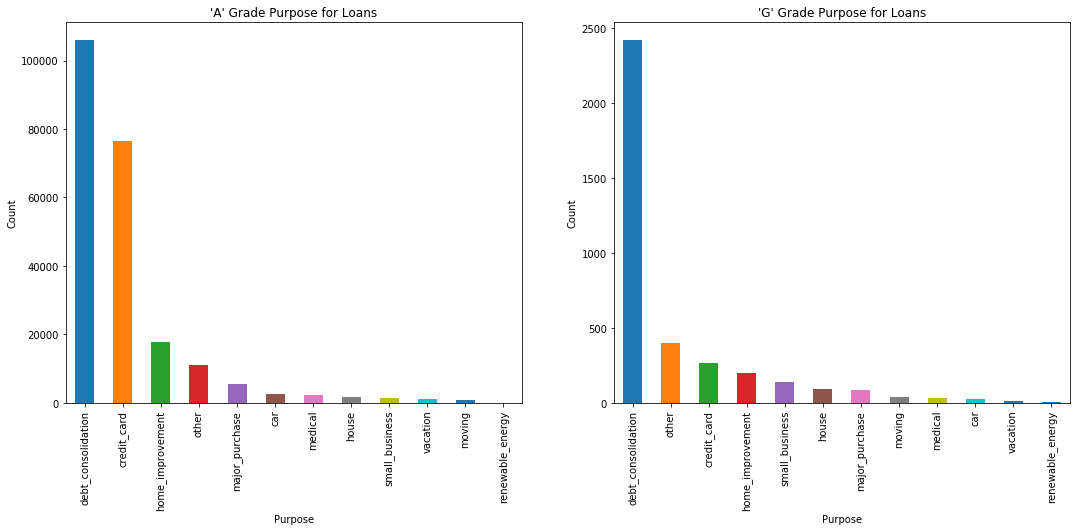

In [22]:
plt.figure(figsize=(18, 7))

plt.subplot(1, 2, 1)
agrades.purpose.value_counts().plot(kind='bar')
plt.title('\'A\' Grade Purpose for Loans')
plt.ylabel('Count')
plt.xlabel('Purpose')

plt.subplot(1, 2, 2)
ggrades = df.loc[df['grade'] == 'G'] # creating a new dataframe with only the G loans
ggrades.purpose.value_counts().plot(kind='bar')
plt.title('\'G\' Grade Purpose for Loans')
plt.ylabel('Count')
plt.xlabel('Purpose')
plt.show()


<br>
These two groups of borrowers are actually pretty similar in their reasons for acquiring loans through Lending Club. For each group debt consolidation dominates as the top reason, and the top four reasons are the same for both, although not in the exact same order.

Let's see how much money 'G' borrowers make and compare that to what we've already seen for 'A' borrowers.
<br><br>

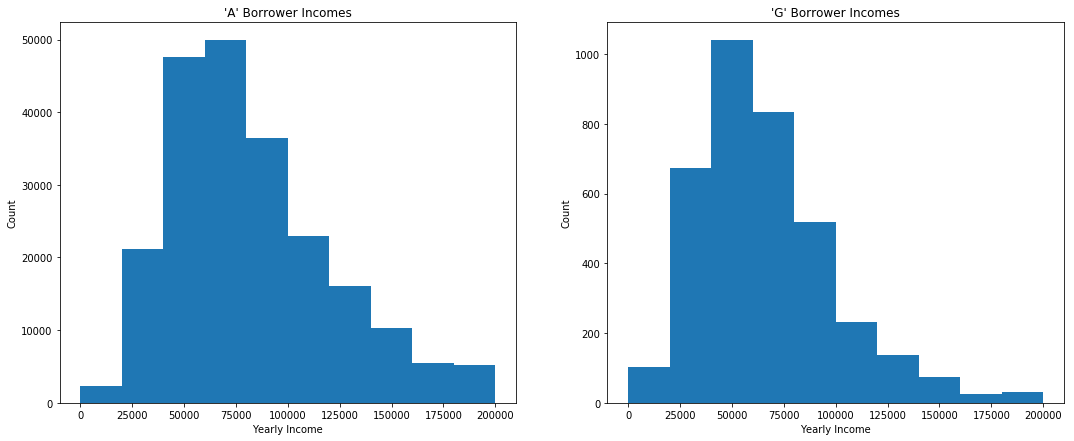

In [23]:
plt.figure(figsize=(18, 7))

plt.subplot(1, 2, 1)
plt.hist(agrades.annual_inc, bins=10, range=(0, 200000))
plt.title('\'A\' Borrower Incomes')
plt.ylabel('Count')
plt.xlabel('Yearly Income')

plt.subplot(1, 2, 2)
plt.hist(ggrades.annual_inc, bins=10, range=(0, 200000))
plt.title('\'G\' Borrower Incomes')
plt.ylabel('Count')
plt.xlabel('Yearly Income')
plt.show()

<br>
Once again, there is surprisingly little difference between the best and worst borrowers, especially when only looking at the histograms of the distribution of incomes for each group. When we take a look at the summary statistics, below, two things jump out. First, the average income for 'G' borrowers is actually higher than that for 'A' borrowers. Second, each percentile shown is lower for 'G' borrowers by a non-trivial amount, but this group still appears to have higher incomes than the general American population.
<br><br>

In [24]:
ggrades.annual_inc.describe()

count      3707.000000
mean      67586.762536
std       40922.924472
min           0.000000
25%       42000.000000
50%       60000.000000
75%       82166.500000
max      600000.000000
Name: annual_inc, dtype: float64

<br>
What we've seen so far is interesting, and might give confidence to an investor, but it cannot inform a sound investment decision. The question that really matters is, if we choose to chase the higher _promised_ return, will we actually _receive_ that higher return? 
<br>
<br>
Let's begin by taking a look at the status of all these loans.
<br><br>

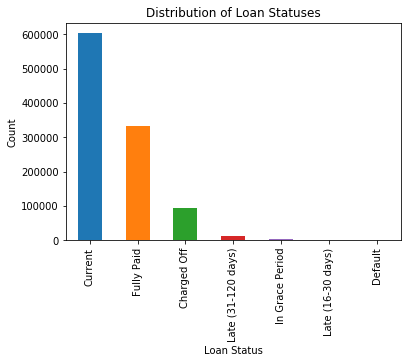

In [25]:
df.loan_status.value_counts().plot(kind='bar')
plt.title('Distribution of Loan Statuses')
plt.ylabel('Count')
plt.xlabel('Loan Status')
plt.show()

<br>
We can see that the overwhelming majority of loans are either current or have been fully repaid. However, somewhere close to 100,000 loans have been charged off, and some amount are late. Let's now see how these distributions change for each grade.
<br><br>

In [26]:
latelist = df.loc[df.loan_status.isin(['Late (31-120 days)', 'Late (16-30 days)', 'Default', 'Charged Off'])]
latebygrade = latelist.groupby('grade')
latebygrade.grade.value_counts() / allbygrade.grade.value_counts()

grade  grade
A      A        0.026494
B      B        0.073219
C      C        0.121817
D      D        0.167170
E      E        0.245279
F      F        0.358289
G      G        0.411923
Name: grade, dtype: float64

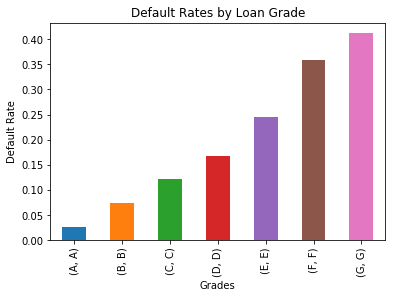

In [27]:
(latebygrade.grade.value_counts() / allbygrade.grade.value_counts()).plot(kind='bar')
plt.title('Default Rates by Loan Grade')
plt.ylabel('Default Rate')
plt.xlabel('Grades')
plt.show()

Wow, now we can see the big difference between 'A' and 'G' loans! While only 2.6% of 'A' loans ever fail to be repaid, a huge 41.2% of 'G' loans fail to be repaid. Now the question becomes, would you rather have a 97.4% chance at a 7% return, or a 58.8% chance at a 29% return? That's a question each investor will have to decide for himself.

## Proposal for Further Research

I have two proposals for further work with this data set. The first is a simple continuation of the work done here. I'd like to take the presented average yield and default rate for each grade, and also use data about how much money was paid on the defaulted loans, and come up with an average realized yield for each grade. 
<br>
<br>
My second proposal for further work with this data set is to create an algorithm that can take in information about a portfolio of investments currently available through Lending Club and output an expected return and expected volatility (standard deviation of expected returns). This model would use several of the variables discussed in this capstone as inputs and predictive variables, such as borrower income, DTI, and credit utilization. However, there are 145 columns of data for each loan, and I'd like to use machine learning to find predictive relationships in the data that might not be apparent at first glance. I would use the majority of this data set to train the model and then use the remainder of the data to test how well the model is working.